In [1]:
import pandas as pd
import tabula as tb
import os
import csv
import glob
import numpy as np

In [2]:
path = r"/Users/seanreseigh/Desktop/KSW"

In [3]:
source = path + "/PDF_Timing_Sheets"

In [4]:
PDF_list = os.listdir(source)
os.chdir(source)
print(PDF_list)

['15_INTID.pdf', '.DS_Store', '1_INTID.pdf', '15_INTID.pdf.csv', '16_INTID.pdf.csv', '1_INTID.pdf.csv', '8_INTID.pdf', '40_INTID.pdf', '16_INTID.pdf', '8_INTID.pdf.csv', '40_INTID.pdf.csv']


In [ ]:
for i in range(len(PDF_list)):
    filename = PDF_list[i]
    tb.read_pdf(filename, pages=1)  # Tabula reads the n page of the PDF
    output_filename = filename + '.csv' #unique file name
    tb.convert_into(filename, output_filename, pages=1)
    print()

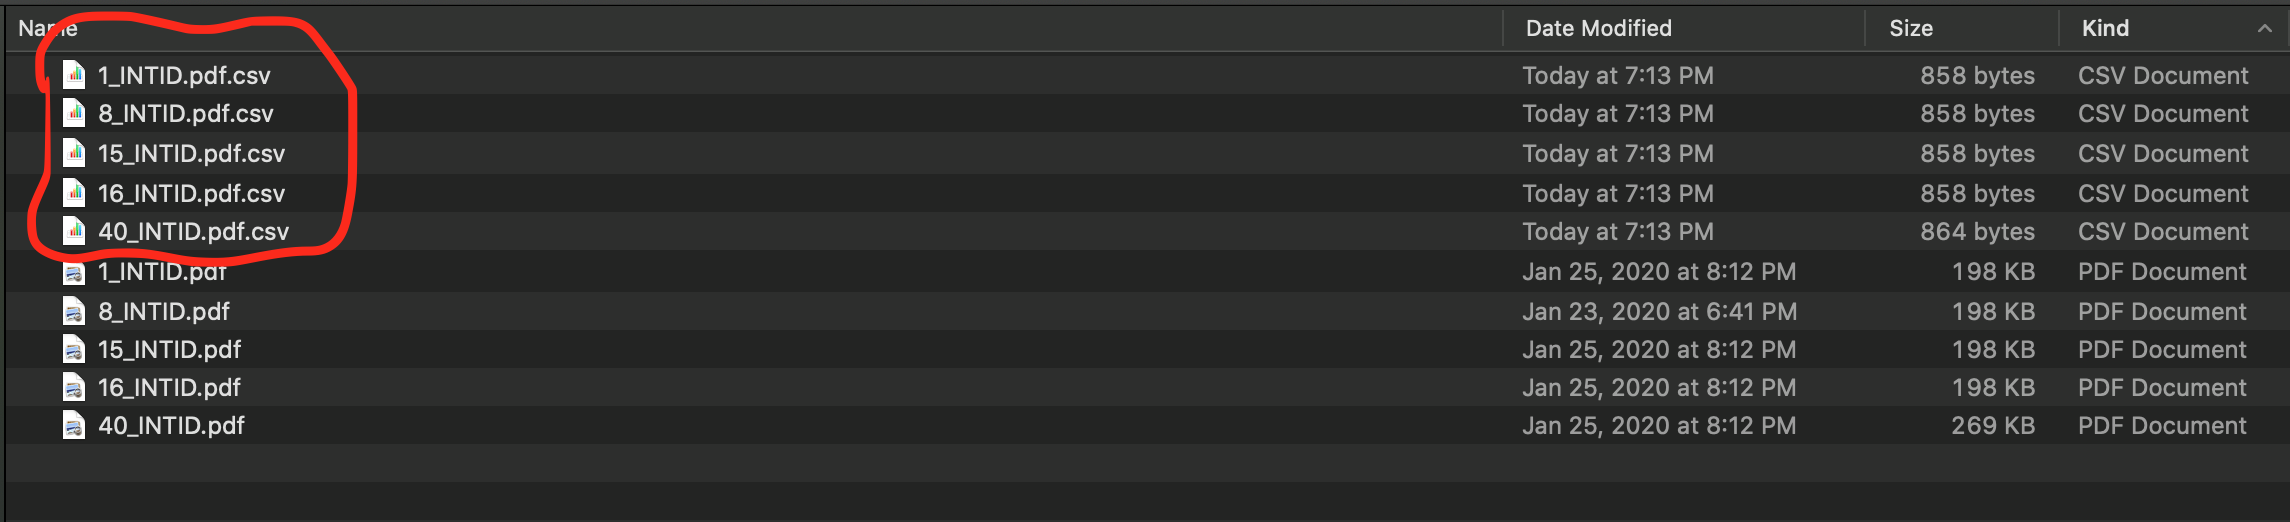

In [5]:
from IPython.display import Image
Image('/Users/seanreseigh/Desktop/CSVs_in_file.png')

In [6]:
os.chdir(source)
result = glob.glob('*.{}'.format('csv'))
print(result)

['15_INTID.pdf.csv', '16_INTID.pdf.csv', '1_INTID.pdf.csv', '8_INTID.pdf.csv', '40_INTID.pdf.csv']


In [11]:
result = glob.glob(os.path.join(source, "*csv"))
combined_csv = path + '/combined.csv'

In [7]:
merge_df = []
for csv in result:
    df = pd.read_csv(csv)
    print(df)

    Unnamed: 0    2  Unnamed: 2  Unnamed: 3  Unnamed: 4    6  Unnamed: 6  \
0          NaN  NaN         NaN         NaN         NaN  NaN         NaN   
1          NaN  NaN         NaN         NaN         NaN  NaN         NaN   
2          NaN  NaN         NaN         NaN         NaN  NaN         NaN   
3          NaN  2.0         NaN         4.0         NaN  6.0         NaN   
4          NaN  NaN         NaN         NaN         NaN  NaN         NaN   
..         ...  ...         ...         ...         ...  ...         ...   
70         NaN  NaN         NaN         NaN         NaN  NaN         NaN   
71         NaN  NaN         NaN         NaN         NaN  NaN         NaN   
72         NaN  NaN         NaN         NaN         NaN  NaN         NaN   
73         NaN  NaN         NaN         NaN         NaN  NaN         NaN   
74         NaN  NaN         NaN         NaN         NaN  NaN         NaN   

    Unnamed: 7  
0          NaN  
1          NaN  
2          NaN  
3          8.0  
4 

In [8]:
for csv in result:
    df = pd.read_csv(csv) #read all csvs in source folder
    df.insert(1, 'INTID', '') #insert new column to each dataframe in Index of 1
    df['INTID'] = os.path.basename(csv) #populate the column with the file CSV name
    merge_df.append(df)
    print(df)

    Unnamed: 0             INTID    2  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0          NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
1          NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
2          NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
3          NaN  15_INTID.pdf.csv  2.0         NaN         4.0         NaN   
4          NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
..         ...               ...  ...         ...         ...         ...   
70         NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
71         NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
72         NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
73         NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   
74         NaN  15_INTID.pdf.csv  NaN         NaN         NaN         NaN   

      6  Unnamed: 6  Unnamed: 7  
0   NaN         NaN         NaN  
1   NaN

In [9]:
merge_df = pd.concat(merge_df) #merge all dataframes into one
merge_df['INTID'].replace(regex=True, inplace=True, to_replace=r'\D', value=r'') #remove all non-digit characters from INTID values
print(merge_df)

    Unnamed: 0 INTID    2  Unnamed: 2  Unnamed: 3  Unnamed: 4    6  \
0          NaN    15  NaN         NaN         NaN         NaN  NaN   
1          NaN    15  NaN         NaN         NaN         NaN  NaN   
2          NaN    15  NaN         NaN         NaN         NaN  NaN   
3          NaN    15  2.0         NaN         4.0         NaN  6.0   
4          NaN    15  NaN         NaN         NaN         NaN  NaN   
..         ...   ...  ...         ...         ...         ...  ...   
70         NaN    40  NaN         NaN         NaN         NaN  NaN   
71         NaN    40  NaN         NaN         NaN         NaN  NaN   
72         NaN    40  NaN         NaN         NaN         NaN  NaN   
73         NaN    40  NaN         NaN         NaN         NaN  NaN   
74         NaN    40  NaN         NaN         NaN         NaN  NaN   

    Unnamed: 6  Unnamed: 7   4   8  
0          NaN         NaN NaN NaN  
1          NaN         NaN NaN NaN  
2          NaN         NaN NaN NaN  
3          

In [12]:
merge_df.to_csv(combined_csv, index = None) #output file to new csv#
for csv in result:
    os.remove(csv) #remove all initially extracted CSV's